In [1]:
import os
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nehaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def load_data():
    print("Loading data...")
    
    ham_files_location = os.listdir("dataset/ham")
    spam_files_location = os.listdir("dataset/spam")
    data = []
    
    # Load ham email
    for file_path in ham_files_location:
        f = open("dataset/ham/" + file_path, "r")
        text = str(f.read())
        data.append([text, "ham"])
    
    # Load spam email
    for file_path in spam_files_location:
        f = open("dataset/spam/" + file_path, "r")
        text = str(f.read())
        data.append([text, "spam"])
        
    data = np.array(data)
    
    print("flag 1: loaded data")
    return data

In [3]:
# Preprocessing data: noise removal

def preprocess_data(data):
    print("Preprocessing data...")
    
    punc = string.punctuation           # Punctuation list
    sw = stopwords.words('english')     # Stopwords list
    
    for record in data:
        # Remove common punctuation and symbols
        for item in punc:
            record[0] = record[0].replace(item, "")
             
        # Lowercase all letters and remove stopwords 
        splittedWords = record[0].split()
        newText = ""
        for word in splittedWords:
            if word not in sw:
                word = word.lower()
                newText = newText + " " + word  # Takes back all non-stopwords
        record[0] = newText
        
    print("flag 2: preprocessed data")        
    return data


# Splitting original dataset into training dataset and test dataset

def split_data(data):
    print("Splitting data...")
    
    features = data[:, 0]   # array containing all email text bodies
    labels = data[:, 1]     # array containing all corresponding labels
    
    training_data, test_data, training_labels, test_labels =\
        train_test_split(features, labels, test_size = 0.20, random_state = 42)
    
    print("flag 3: splitted data")
    return training_data, test_data, training_labels, test_labels


In [4]:
# Get count of each word in email, returns dictionary with each word with the respective count

def get_count(text):
    wordCounts = dict()
    for word in text.split():
        if word in wordCounts:
            wordCounts[word] += 1
        else:
            wordCounts[word] = 1
    
    return wordCounts


In [5]:
# Get the similarity by calculating the euclidean difference, returns double

def euclidean_difference(test_WordCounts, training_WordCounts):
    total = 0
     
    for word in test_WordCounts:
        # if word is in both emails, calculate count difference, square it, and add to total
        if word in test_WordCounts and word in training_WordCounts:
            total += (test_WordCounts[word] - training_WordCounts[word])**2
            
            # to remove common words, to speed up processing in next for loop
            del training_WordCounts[word] 
            
        # if word in test email only, square the count and add to total
        else:
            total += test_WordCounts[word]**2
    
    # Square the count of words only in training email and add to total
    for word in training_WordCounts:
            total += training_WordCounts[word]**2
            
    return total**0.5

In [6]:
# Returns the class to which current email belongs to as a string

def get_class(selected_Kvalues):
    spam_count = 0
    ham_count = 0
    
    # Counts the frequency of each class in K nearest neighbours
    for value in selected_Kvalues:
        if value[0] == "spam":
            spam_count += 1
        else:
            ham_count += 1
    
    if spam_count > ham_count:
        return "spam"
    else:
        return "ham"

In [7]:
# KNN classifier, returns list of labels of test_data

def knn_classifier(training_data, training_labels, test_data, K, tsize):
    print("Running KNN Classifier...")
    
    result = []
    counter = 1
    
    # word counts for training email
    training_WordCounts = [] 
    for training_text in training_data:
            training_WordCounts.append(get_count(training_text))  
            
    for test_text in test_data:
        similarity = [] # List of euclidean distances
        test_WordCounts = get_count(test_text)  # word counts for test email
        
        # Getting euclidean difference 
        for index in range(len(training_data)):
            euclidean_diff =\
                euclidean_difference(test_WordCounts, training_WordCounts[index])
            similarity.append([training_labels[index], euclidean_diff])
        
        # Sort list in ascending order based on euclidean difference
        similarity = sorted(similarity, key = lambda i:i[1])    
        
        # Select K nearest neighbours
        selected_Kvalues = [] 
        for i in range(K):
            selected_Kvalues.append(similarity[i])
            
        # Predicting the class of email
        result.append(get_class(selected_Kvalues))
        
        print(str(counter) + "/" + str(tsize) + " done!")
        counter += 1
        
    return result

In [8]:
def main(K):
    data = load_data()
    data = preprocess_data(data)
    training_data, test_data, training_labels, test_labels = split_data(data)
    
    # sample size of test emails to be tested. Use len(test_data) to test all test_data
    # tsize = len(test_data)
    tsize = 50
    
    result = knn_classifier(training_data, training_labels, test_data[:tsize], K, tsize) 
    accuracy = accuracy_score(test_labels[:tsize], result)
    
    print("training data size\t: " + str(len(training_data)))
    print("test data size\t\t: " + str(len(test_data)))
    print("K value\t\t\t\t: " + str(K))
    print("Samples tested\t\t: " + str(tsize))
    print("% accuracy\t\t\t: " + str(accuracy * 100))
    print("Number correct\t\t: " + str(int(accuracy * tsize)))
    print("Number wrong\t\t: " + str(int((1 - accuracy) * tsize)))

    print(result)


In [9]:
main(11)

Loading data...
flag 1: loaded data
Preprocessing data...
flag 2: preprocessed data
Splitting data...
flag 3: splitted data
Running KNN Classifier...
1/50 done!
2/50 done!
3/50 done!
4/50 done!
5/50 done!
6/50 done!
7/50 done!
8/50 done!
9/50 done!
10/50 done!
11/50 done!
12/50 done!
13/50 done!
14/50 done!
15/50 done!
16/50 done!
17/50 done!
18/50 done!
19/50 done!
20/50 done!
21/50 done!
22/50 done!
23/50 done!
24/50 done!
25/50 done!
26/50 done!
27/50 done!
28/50 done!
29/50 done!
30/50 done!
31/50 done!
32/50 done!
33/50 done!
34/50 done!
35/50 done!
36/50 done!
37/50 done!
38/50 done!
39/50 done!
40/50 done!
41/50 done!
42/50 done!
43/50 done!
44/50 done!
45/50 done!
46/50 done!
47/50 done!
48/50 done!
49/50 done!
50/50 done!
training data size	: 4685
test data size		: 1172
K value				: 11
Samples tested		: 50
% accuracy			: 82.0
Number correct		: 41
Number wrong		: 9
['spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham'

In [11]:
# Plotting accuracy for different test sizes

tsize = [50, 150, 300, 600, 900, 1200, 1582]
accuracy = [80.0, 82.7, 84.0, 80.7, 79.0, 76.6, 76.7]

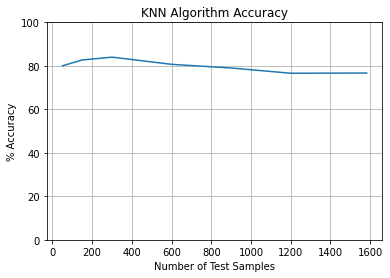

In [12]:
plt.figure()
plt.ylim(0, 100)
plt.plot(tsize, accuracy)
plt.xlabel("Number of Test Samples")
plt.ylabel("% Accuracy")
plt.title("KNN Algorithm Accuracy")
plt.grid()
plt.show()

In [13]:
# to determine a suitable value for K

def get_k():
    data = load_data()
    data = preprocess_data(data)
    training_data, test_data, training_labels, test_labels = split_data(data)
    
    # sample size of test emails to be tested. Use len(test_data) to test all test_data
    tsize = 150
    
    K_accuracy = []
    for K in range(1,50, 2):
        result = knn_classifier(training_data, training_labels, test_data[:tsize], K, tsize) 
        accuracy = accuracy_score(test_labels[:tsize], result)
        K_accuracy.append([K, accuracy*100])
        print("training data size\t: " + str(len(training_data)))
        print("test data size\t\t: " + str(len(test_data)))
        print("K value\t\t\t\t: " + str(K))
        print("Samples tested\t\t: " + str(tsize))
        print("% accuracy\t\t\t: " + str(accuracy * 100))
        print("Number correct\t\t: " + str(int(accuracy * tsize)))
        print("Number wrong\t\t: " + str(int((1 - accuracy) * tsize)))
    K_accuracy_sorted = sorted(K_accuracy, key = lambda i:i[1])
    print(K_accuracy_sorted)
    print("MAX: " + str(max(K_accuracy_sorted, key = lambda i:i[1])))
    
    # plot
    
    K_accuracy = np.array(K_accuracy)
    K_values = K_accuracy[:, 0]
    accuracies = K_accuracy[:, 1]
    
    plt.figure()
    plt.ylim(0, 101)
    plt.plot(K_values, accuracies)
    plt.xlabel("K Value")
    plt.ylabel("% Accuracy")
    plt.title("KNN Algorithm Accuracy With Different K")
    plt.grid()
    plt.show()

Loading data...
flag 1: loaded data
Preprocessing data...
flag 2: preprocessed data
Splitting data...
flag 3: splitted data
Running KNN Classifier...
1/150 done!
2/150 done!
3/150 done!
4/150 done!
5/150 done!
6/150 done!
7/150 done!
8/150 done!
9/150 done!
10/150 done!
11/150 done!
12/150 done!
13/150 done!
14/150 done!
15/150 done!
16/150 done!
17/150 done!
18/150 done!
19/150 done!
20/150 done!
21/150 done!
22/150 done!
23/150 done!
24/150 done!
25/150 done!
26/150 done!
27/150 done!
28/150 done!
29/150 done!
30/150 done!
31/150 done!
32/150 done!
33/150 done!
34/150 done!
35/150 done!
36/150 done!
37/150 done!
38/150 done!
39/150 done!
40/150 done!
41/150 done!
42/150 done!
43/150 done!
44/150 done!
45/150 done!
46/150 done!
47/150 done!
48/150 done!
49/150 done!
50/150 done!
51/150 done!
52/150 done!
53/150 done!
54/150 done!
55/150 done!
56/150 done!
57/150 done!
58/150 done!
59/150 done!
60/150 done!
61/150 done!
62/150 done!
63/150 done!
64/150 done!
65/150 done!
66/150 done!
6

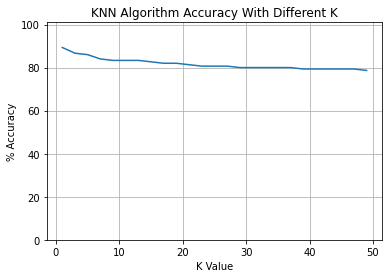

In [14]:
get_k()